<a href="https://colab.research.google.com/github/aelukin/DS_portfolio/blob/main/housing_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Housing Prices Competition

In this project, we will look at the [dataset](https://www.kaggle.com/competitions/home-data-for-ml-course/) which contains selling prices for houses in [Ames, Iowa](https://jse.amstat.org/v19n3/decock.pdf). The dataset includes specs of the lot, as well as data on its location and surroundings, which might be useful when determining the price.

The goal of this work is to build a model that will be able to predict the selling price of a house.

The end-goal can be achieved in following steps:

1. Upload the dataset and connect the libraries.
2. Data preparation:
    * Run a surface-level EDA to check the integrity of the data
    * Fill in the missing values
    * Feature engineering (if necessary)
3. EDA:
    * Obtain useful insights
    * Find patterns
    * Look for correlations
4. Model building:
    * Select a model
    * Use cross validation for hyperparameter tuning
    * Build an evaluate model
5. Submission preparation:
    * Use the model to make predictions
    * Format and export predictions
6. Conclusion

## Upload the dataset and connect the libraries

Connecting basic libraries for data analysis and visualization:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

We will use Kaggle API to automatically download the dataset into Colab:

In [ ]:
!pip install kaggle

!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c home-data-for-ml-course
!unzip home-data-for-ml-course.zip

mkdir: cannot create directory ‘/.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory
mv: cannot move '/.kaggle' to '/root/.kaggle': Directory not empty
  0% 0.00/386k [00:00<?, ?B/s]
100% 386k/386k [00:00<00:00, 111MB/s]
Archive:  home-data-for-ml-course.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: sample_submission.csv.gz  
  inflating: test.csv                
  inflating: test.csv.gz             
  inflating: train.csv               
  inflating: train.csv.gz            


Import files

In [ ]:
train = pd.read_csv('/content/train.csv', index_col=[0])
test = pd.read_csv('/content/test.csv', index_col=[0])
sample_submission = pd.read_csv('/content/sample_submission.csv', index_col=[0])
data_description = open('/content/data_description.txt')

In [ ]:
test.shape

(1459, 79)

Set the number of visible rows and colomns to max.

In [ ]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

## Data preparation:

View the description

In [ ]:
print(data_description.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

For ease of processing and encoding data, combine the `train` and `test` datasets together and run a quick surface EDA.

In [ ]:
df = pd.concat([train,test])

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [ ]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


Find the missing values

In [ ]:
df.isna().sum()/len(df)*100

,0
MSSubClass,0.000000
MSZoning,0.137033
LotFrontage,16.649538
LotArea,0.000000
Street,0.000000
Alley,93.216855
LotShape,0.000000
LandContour,0.000000
Utilities,0.068517
LotConfig,0.000000


We have a relatively big amount of features in our dataset. Before proceeding with the data, let's look at the correlations. The correlation table will be too unwieldy, so instead we will use [Phi_K global correlation coefficient](https://phik.readthedocs.io/en/latest/).

Application of Phi_K will allow us to see how both categorical and numerical features correlate with the target variable.

In [ ]:
# import phi_k
!pip install phik
import phik
from phik import resources, report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.4 MB/s eta 0:00:00


In [ ]:
features = train.drop(columns='SalePrice').columns.to_list()

correlations = {}

for feature in features:
    corr_coef = train[[feature, 'SalePrice']].phik_matrix().to_numpy()[0,1]
    correlations[feature] = corr_coef

interval columns not set, guessing: ['MSSubClass', 'SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['LotFrontage', 'SalePrice']
interval columns not set, guessing: ['LotArea', 'SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['SalePrice']
interval columns not set, guessing: ['OverallQual', 'SalePrice']
interval columns not set, guessing: ['OverallCond', 'SalePrice']
interval columns not set, gues

Let's see the correlation coefficients:

In [ ]:
correlations

{'MSSubClass': 0.34297828838874417,
 'MSZoning': 0.45740490192922806,
 'LotFrontage': 0.3308187194156628,
 'LotArea': 0.2170813780958345,
 'Street': 0.0,
 'Alley': 0.6831645536510756,
 'LotShape': 0.3223534036650453,
 'LandContour': 0.1594560724267758,
 'Utilities': 0.0,
 'LotConfig': 0.20723543437486425,
 'LandSlope': 0.0785926766429356,
 'Neighborhood': 0.6878963440599475,
 'Condition1': 0.14246930655878803,
 'Condition2': 0.0,
 'BldgType': 0.20804905746020652,
 'HouseStyle': 0.26360858934210435,
 'OverallQual': 0.8206267421943545,
 'OverallCond': 0.3365683920291601,
 'YearBuilt': 0.6207412340973916,
 'YearRemodAdd': 0.5622178438208075,
 'RoofStyle': 0.21203976913320666,
 'RoofMatl': 0.2496523930791728,
 'Exterior1st': 0.4087080553344232,
 'Exterior2nd': 0.4135952357044357,
 'MasVnrType': 0.33332697993447946,
 'MasVnrArea': 0.7704906689179454,
 'ExterQual': 0.675875359898308,
 'ExterCond': 0.24771216955707437,
 'Foundation': 0.4524877588381421,
 'BsmtQual': 0.655659436511749,
 'BsmtC

Now that we've obtained the coefficients, we can perform a feature selection. To do so, we will iterate through the calculated coefficients and print out features which have correlation coefficient higher than 0.2. We will also save them into a list for further use.

In [ ]:
high_corr_features = []

for key,value in correlations.items():
    if value > 0.2:
        high_corr_features.append(key)
        print(f'{key}: {value}')

MSSubClass: 0.34297828838874417
MSZoning: 0.45740490192922806
LotFrontage: 0.3308187194156628
LotArea: 0.2170813780958345
Alley: 0.6831645536510756
LotShape: 0.3223534036650453
LotConfig: 0.20723543437486425
Neighborhood: 0.6878963440599475
BldgType: 0.20804905746020652
HouseStyle: 0.26360858934210435
OverallQual: 0.8206267421943545
OverallCond: 0.3365683920291601
YearBuilt: 0.6207412340973916
YearRemodAdd: 0.5622178438208075
RoofStyle: 0.21203976913320666
RoofMatl: 0.2496523930791728
Exterior1st: 0.4087080553344232
Exterior2nd: 0.4135952357044357
MasVnrType: 0.33332697993447946
MasVnrArea: 0.7704906689179454
ExterQual: 0.675875359898308
ExterCond: 0.24771216955707437
Foundation: 0.4524877588381421
BsmtQual: 0.655659436511749
BsmtCond: 0.2035155558682627
BsmtExposure: 0.3352310652643222
BsmtFinType1: 0.37500850415011877
BsmtFinSF1: 0.5111980474726739
BsmtUnfSF: 0.47073022148753246
TotalBsmtSF: 0.5762274878129166
HeatingQC: 0.5149854076605723
CentralAir: 0.5439126120219858
Electrical: 0

In [ ]:
len(high_corr_features)

59

Now we're left with 59 features.

As a next step, we will need to fill the missing values.

In [ ]:
df[high_corr_features].isna().sum()/len(df)*100

,0
MSSubClass,0.0
MSZoning,0.0
LotFrontage,0.0
LotArea,0.0
Alley,0.0
LotShape,0.0
LotConfig,0.0
Neighborhood,0.0
BldgType,0.0
HouseStyle,0.0


The description for the dataset states that NA's are used to mark missing features for the property. For example, in case of a missing swimming pool, parameter `PoolQC` will be `NA` and pool area will be 0. If the house does not have a garage, we will see `NA` in `GarageArea`.  

Before we proceed, we will use this knowledge to fill the missing values:
* In case of missing values in categorical features, fill the values with "Not available".
* In case of numerical features, fill the values with "0".

We have to be careful and avoid filling the target variable since right now it contains combined train and test values.

In [ ]:
for feature in df[high_corr_features].columns:
    if df[feature].dtypes == 'object':
        df[feature].fillna('Not available', inplace=True)
    else:
        df[feature].fillna(0, inplace=True)

In [ ]:
df[high_corr_features].isna().sum()/len(df)*100

,0
MSSubClass,0.0
MSZoning,0.0
LotFrontage,0.0
LotArea,0.0
Alley,0.0
LotShape,0.0
LotConfig,0.0
Neighborhood,0.0
BldgType,0.0
HouseStyle,0.0


The missing values are filled! We can now move to EDA.

## EDA

First, we will visualize the target variable:

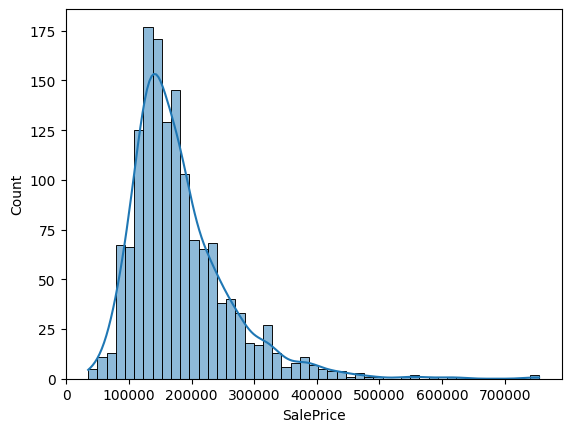

In [ ]:
sns.histplot(data=df, x='SalePrice', kde=True);

The distribution is skewed to the left, however, it doesn't seem significant enough to affect the model. Let's try to normalize the date using log-10:

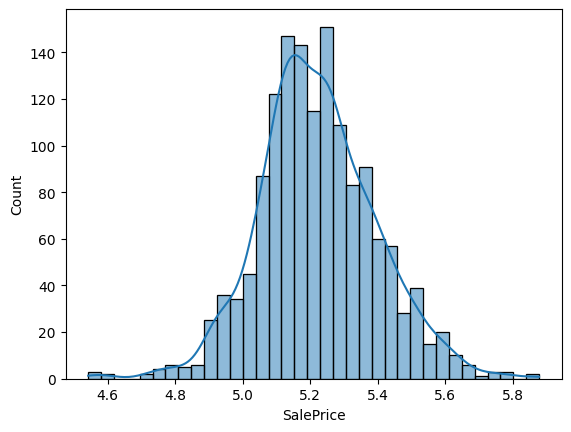

In [ ]:
SalePrice_log10 = np.log10(df['SalePrice'])
sns.histplot(SalePrice_log10, kde=True);

The distribution is now closer to normal. However, we will proceed with non-normalized data for the ease of interpretability.

As a next step, we will check our data for collinearity using the same Phi_K coefficient as before, but this time presented as a matrix:

interval columns not set, guessing: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'PoolArea', 'PoolQC', 'SaleType', 'SaleCondition', 'SalePrice']


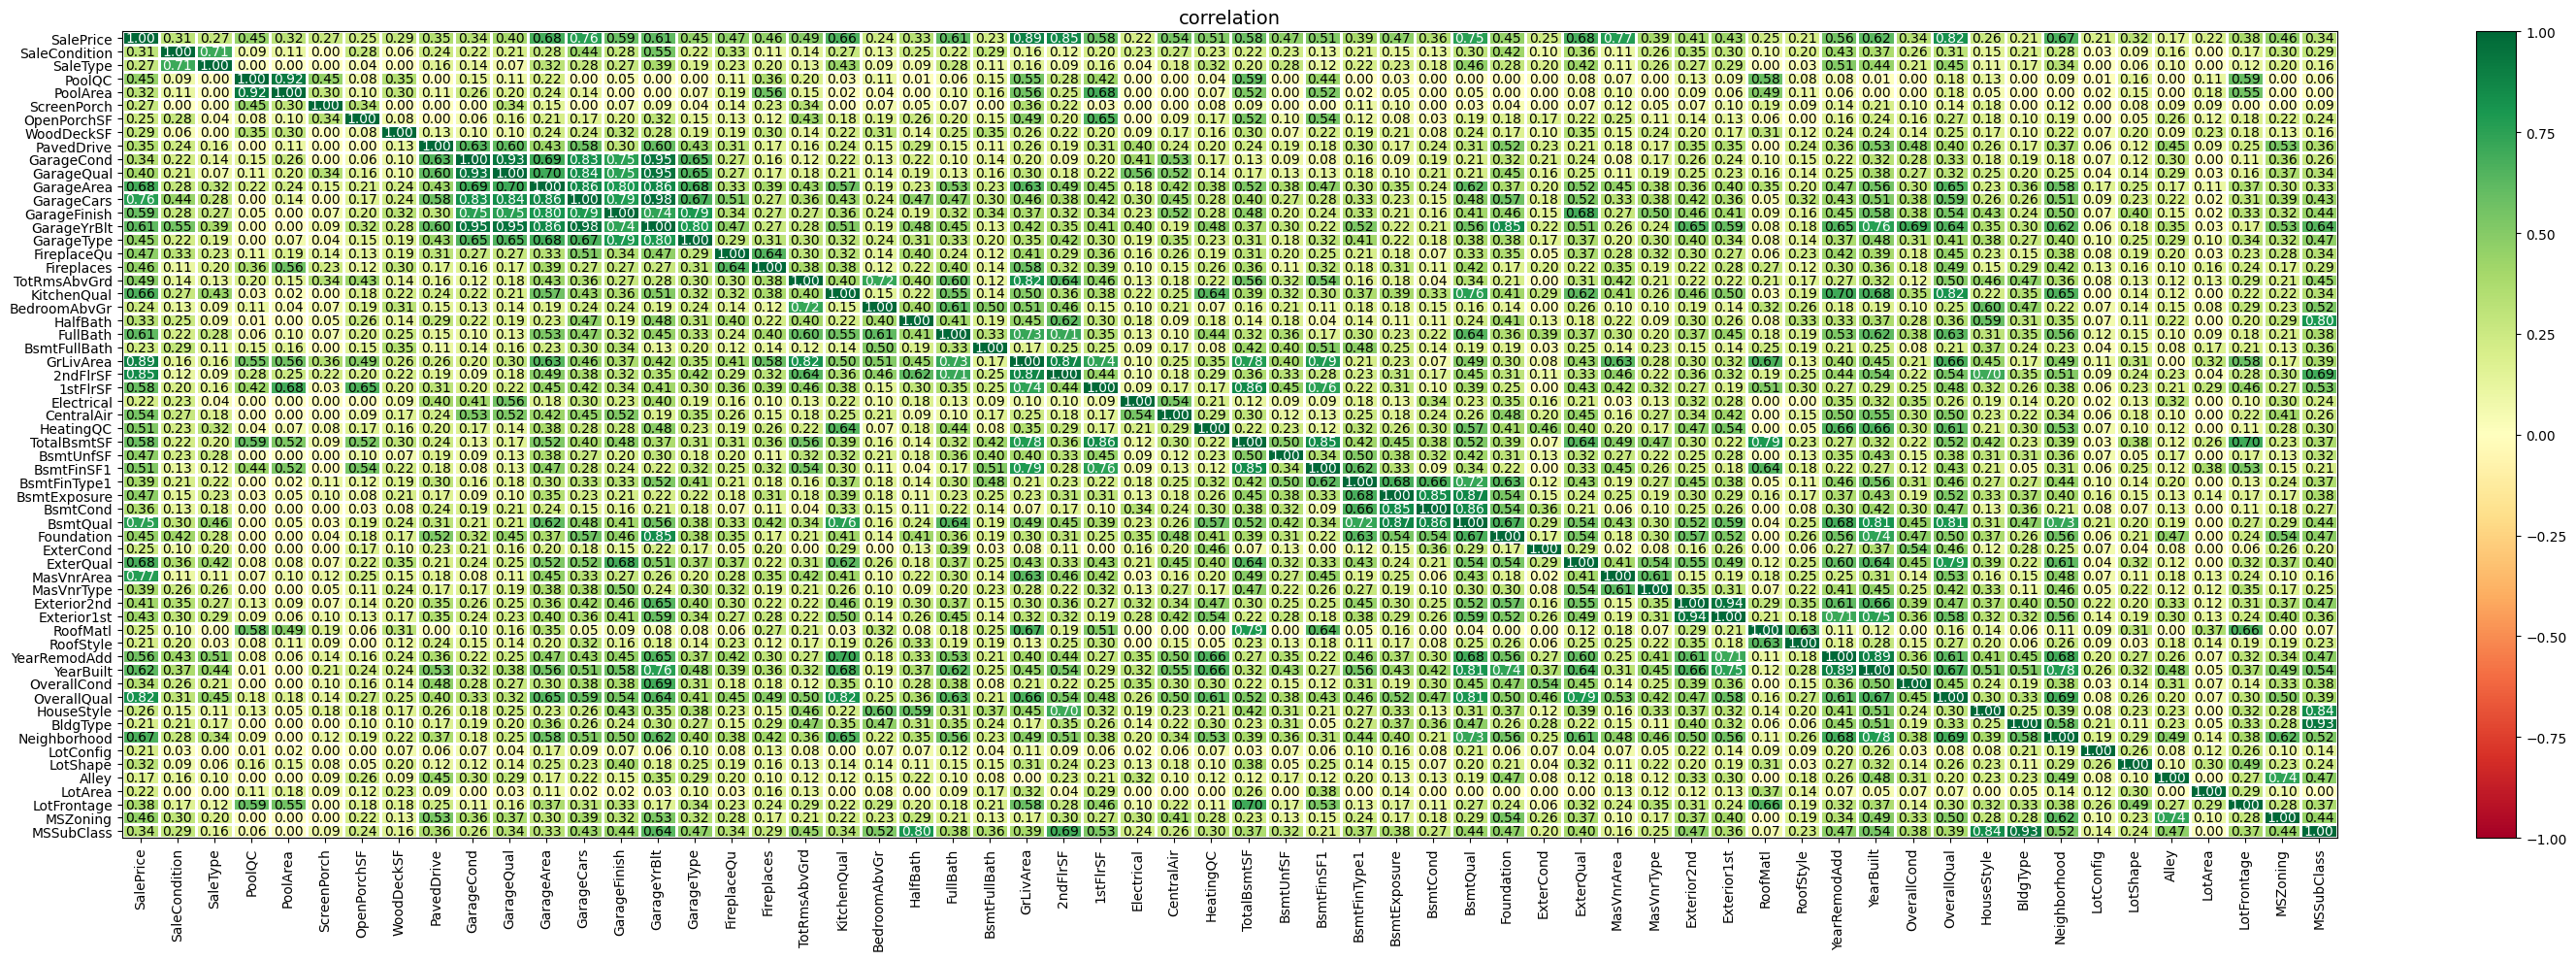

In [ ]:
from phik.report import plot_correlation_matrix

features_for_phik = high_corr_features.copy()
features_for_phik.append('SalePrice')

phik_overview = df[features_for_phik].phik_matrix()
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(30, 10))

We have strong (>0.9) collinearity between some of the features. To solve this problem, in each pair of collinear features we will remove the one with the least correlation with the target variable.

In [ ]:
collinear_features = ['PoolArea','GarageCond','GarageQual','GarageYrBlt','Exterior2nd','BldgType']
selected_features = high_corr_features.copy()

for feature in collinear_features:
    selected_features.remove(feature)

print(f'Features with high correlation: {len(high_corr_features)}\nSelected features: {len(selected_features)}')

Features with high correlation: 59
Selected features: 53


We are now left with 53 selected features.

## Model building

We will start with encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

data_filled = df[selected_features]

for feature in data_filled.columns:
    if data_filled[feature].dtypes == 'object':
        data_filled[feature] = LabelEncoder().fit_transform(data_filled[feature])

Split the data back into testing and training datasets, define features and target variable.

In [ ]:
X_train = data_filled.loc[data_filled.index.isin(train.index)]
X_test = data_filled.loc[data_filled.index.isin(test.index)]
y_train = train['SalePrice']

For this case, a Histogram Gradient Boosting Regressor will be used. This type of regressor is based on decision tree, which have multiple advantages, such as being able to handle both categorical and numerical values, low sensitivity to scaling and ability to capture non-linear relationships. The model will be cross-validated using RMSE as a score.

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

HGBregr = HistGradientBoostingRegressor()

scores = cross_val_score(HGBregr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(f'Crossval score (RMSE): {round(-scores.mean(),3)}')

Crossval score (RMSE): 28223.163


Let's see if feature selection had any effect on the metric by training and validating a model using the full list of highly correlated features

In [ ]:
data = df[high_corr_features]

for feature in data.columns:
    if data[feature].dtypes == 'object':
        data[feature] = LabelEncoder().fit_transform(data[feature])

X_train = data.loc[data.index.isin(train.index)]
X_test = data.loc[data.index.isin(test.index)]
y_train = train['SalePrice']

HGBregr = HistGradientBoostingRegressor()

scores = cross_val_score(HGBregr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
print(f'Crossval score (RMSE): {round(-scores.mean(),3)}')

Crossval score (RMSE): 27943.031


Cross-validation results show that the removal of collinear features actually reduced the final score. Because of that, we will proceed with training our model using the full set of highly correlating features (`high_corr_features`). GridSearchCV will allow to find optimal hyperparameters.

In [251]:
param_grid = {'loss':['gamma', 'poisson'],
              'learning_rate': [0.01,0.05,0.1],
              'l2_regularization': [0, 0.2, 0.5, 1],
              'max_features': [0.2,0.5,1],
              'max_iter': [200, 300, 400],
              'max_leaf_nodes': [30, 40],}
grid = GridSearchCV(HGBregr, param_grid, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)

In [252]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=10,
             estimator=HistGradientBoostingRegressor(l2_regularization=0.5,
                                                     learning_rate=0.05,
                                                     loss='poisson',
                                                     max_features=0.2,
                                                     max_iter=200,
                                                     max_leaf_nodes=40),
             n_jobs=-1,
             param_grid={'l2_regularization': [0, 0.2, 0.5, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'loss': ['gamma', 'poisson'],
                         'max_features': [0.2, 0.5, 1],
                         'max_iter': [200, 300, 400],
                         'max_leaf_nodes': [30, 40]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [254]:
print(grid.best_score_)
print(grid.best_estimator_)

-25717.893261343474
HistGradientBoostingRegressor(l2_regularization=0.5, learning_rate=0.05,
                              loss='poisson', max_features=0.2, max_iter=200,
                              max_leaf_nodes=40)


Train the final model using the entire training dataset and optimized hyperparameters:

In [264]:
HGBregr = HistGradientBoostingRegressor(l2_regularization=grid.best_estimator_.l2_regularization,
                                        learning_rate=grid.best_estimator_.learning_rate,
                                        loss=grid.best_estimator_.loss,
                                        max_features=grid.best_estimator_.max_features,
                                        max_iter=grid.best_estimator_.max_iter,
                                        max_leaf_nodes=grid.best_estimator_.max_leaf_nodes)

In [265]:
HGBregr.fit(X_train, y_train)

HistGradientBoostingRegressor(l2_regularization=0.5, learning_rate=0.05,
                              loss='poisson', max_features=0.2, max_iter=200,
                              max_leaf_nodes=40)

## Submission preparation

Make predictions

In [266]:
preds = HGBregr.predict(X_test)

Export predictions in an appropriate format

In [267]:
submission = pd.DataFrame({'Id': X_test.index, 'SalePrice': preds})
submission.to_csv('submission-housing.csv', index=False)

## Conclusion

The presented model scored 13878.92193 in the [Kaggle Housing Prices Competition](https://www.kaggle.com/competitions/home-data-for-ml-course/leaderboard?), making it a top-100 prediction (#68 as of Jan 7th, 2025).

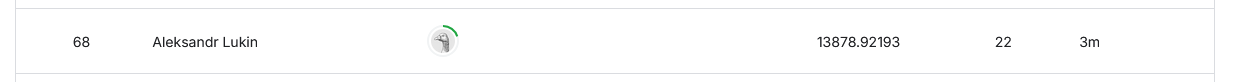